In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
from time import sleep 
import numpy as np

import matplotlib.pyplot as plt

import random

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
secrets_file = open("/Users/lucaalfano/IH-labs/secrets.txt","r")

string = secrets_file.read()

secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
        
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

# Get Files

In [5]:
top100 = pd.read_csv('top100.csv')
spotifysongs = pd.read_csv('/Users/lucaalfano/IH-labs/lab-web-scraping-single-page234567/finalsongs.csv')


In [6]:
top100

,title,artist,rank
0,Unholy,Sam Smith & Kim Petras,1
1,Everywhere,Fleetwood Mac,2
2,I'm Good (Blue),David Guetta & Bebe Rexha,3
3,Thank God,Kane Brown & Katelyn Brown,4
4,EDGING,blink-182,5
...,...,...,...
95,Feel Good Inc.,Gorillaz,96
96,God Is In This Story,Katy Nichole & Big Daddy Weave,97
97,This Is Halloween,The Citizens of Halloween,98
98,Waiting,Bailey Zimmerman,99


In [7]:
my_list = top100['title']

my_list_lower = list(pd.Series(my_list).str.lower())
# convert to lower so the capitalizations don't mess up the string match

my_list_lower[0]
my_list_lower[1]

'everywhere'

In [8]:
spotifysongs = spotifysongs.drop(['popularity'], axis=1)
spotifysongs

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.0000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.0000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371
2,R3HAB,Radio Silence,0.025000,0.603,138913,0.723,0.0000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382
3,Chris Cooq,Lactose,0.029400,0.800,125381,0.579,0.9120,5,0.0994,-12.118,0,0.0701,123.003,4,0.641
4,Chris Cooq,Same - Original mix,0.000035,0.783,124016,0.792,0.8780,7,0.0332,-10.277,1,0.0661,120.047,4,0.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247030,Roma Atmosphere,Sette Oche,0.978000,0.103,245714,0.086,0.9630,9,0.0987,-20.715,0,0.0399,57.545,4,0.037
247031,Philthy Rich,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy)",0.099200,0.674,221934,0.628,0.0000,9,0.3740,-8.277,0,0.1890,93.053,4,0.613
247032,Nef The Pharaoh,Ludacris,0.027700,0.792,183771,0.747,0.0000,11,0.1170,-8.753,0,0.3420,94.498,4,0.584
247033,The Ting Tings,Estranged,0.067500,0.548,311267,0.506,0.0244,10,0.1050,-8.251,1,0.0286,163.967,4,0.271


# Clustering

In [9]:
X = spotifysongs.select_dtypes(np.number)
Xcat = spotifysongs.select_dtypes(object)
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928


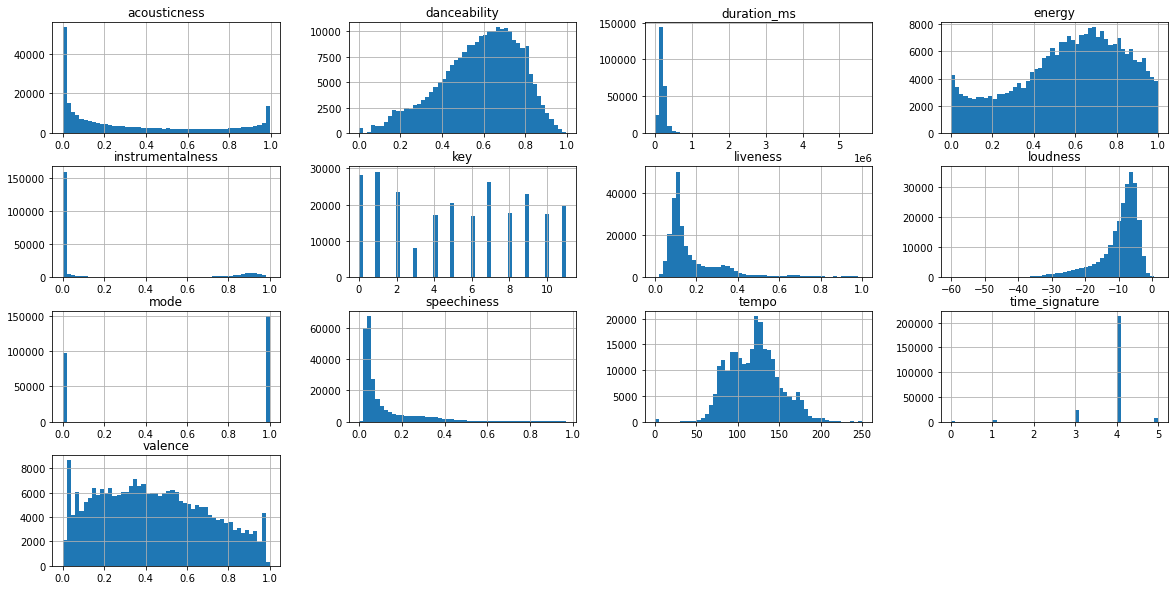

In [10]:
X.hist(bins=50,figsize=(20,10))
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X)
Xscale = transformer.transform(X) 
pd.DataFrame(Xscale,columns=X.columns).head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.967840,0.847761,0.208406,-0.891887,-0.627144,-1.175507,-0.676495,0.349757,0.803557,2.387536,2.798539,0.232811,-1.238092
1,-0.913898,1.389927,0.017848,-0.051779,-0.627144,0.767176,0.545674,0.413968,0.803557,2.773536,1.309009,0.232811,-0.262420
2,-0.912156,0.110837,-0.595603,0.587937,-0.627144,1.044702,-0.669334,0.623767,-1.244467,-0.536413,-0.151506,0.232811,-0.219999
3,-0.899382,1.147795,-0.704992,0.033003,1.893636,-0.065403,-0.567884,-0.330673,-1.244467,-0.337784,0.115010,0.232811,0.778812
4,-0.984634,1.058311,-0.716027,0.853843,1.799660,0.489650,-0.962941,-0.048540,0.803557,-0.369951,0.016986,0.232811,1.885603


In [12]:
%%time
import numpy as np
from sklearn.cluster import KMeans


# K = range(2, 15)
# inertia = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=1234)
#     kmeans.fit(X_prep)
#     inertia.append(kmeans.inertia_)

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(16,8))
# plt.plot(K, inertia, 'bx-')
# plt.xlabel('k')
# plt.ylabel('inertia')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Elbow Method showing the optimal k')

CPU times: user 76.9 ms, sys: 34.7 ms, total: 112 ms
Wall time: 153 ms


![title](screenshot2.png)


In [13]:
# %%time
# from sklearn.metrics import silhouette_score
# K = range(2, 15)
# silhouette = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=1234)
#     kmeans.fit(X_prep)
#     silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


# plt.figure(figsize=(16,8))
# plt.plot(K, silhouette, 'bx-')
# plt.xlabel('k')
# plt.ylabel('silhouette score')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Slhouette score showing the optimal k')

![title](screenshot.png)


In [14]:
%%time
kmeans8 = KMeans(n_clusters=8)
kmeans8.fit(Xscale)
print(kmeans8.inertia_)

1878403.6230186934
CPU times: user 9.23 s, sys: 1.43 s, total: 10.7 s
Wall time: 1.58 s


In [15]:
clusters = kmeans8.predict(Xscale)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     3811
1    75318
2    36811
3      207
4    15639
5    59947
6    27282
7    28020
dtype: int64

In [16]:
clusters = pd.DataFrame({'clusters':clusters})

In [17]:
clusters

,clusters
0,6
1,6
2,5
3,5
4,1
...,...
247030,7
247031,5
247032,6
247033,1


In [18]:
Xscale = pd.DataFrame(Xscale, columns=X.columns)
Xscale

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.967840,0.847761,0.208406,-0.891887,-0.627144,-1.175507,-0.676495,0.349757,0.803557,2.387536,2.798539,0.232811,-1.238092
1,-0.913898,1.389927,0.017848,-0.051779,-0.627144,0.767176,0.545674,0.413968,0.803557,2.773536,1.309009,0.232811,-0.262420
2,-0.912156,0.110837,-0.595603,0.587937,-0.627144,1.044702,-0.669334,0.623767,-1.244467,-0.536413,-0.151506,0.232811,-0.219999
3,-0.899382,1.147795,-0.704992,0.033003,1.893636,-0.065403,-0.567884,-0.330673,-1.244467,-0.337784,0.115010,0.232811,0.778812
4,-0.984634,1.058311,-0.716027,0.853843,1.799660,0.489650,-0.962941,-0.048540,0.803557,-0.369951,0.016986,0.232811,1.885603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247030,1.854599,-2.521035,0.267748,-1.866875,2.034601,1.044702,-0.572062,-1.648161,-1.244467,-0.580642,-2.055650,0.232811,-1.550462
247031,-0.696738,0.484563,0.075517,0.221835,-0.627144,1.044702,1.070825,0.257960,-1.244467,0.618370,-0.878165,0.232811,0.670833
247032,-0.904318,1.105685,-0.232983,0.680426,-0.627144,1.599754,-0.462854,0.185013,-1.244467,1.848745,-0.830248,0.232811,0.558997
247033,-0.788770,-0.178669,0.797662,-0.248318,-0.559702,1.322228,-0.534466,0.261944,0.803557,-0.671513,1.473421,0.232811,-0.648061


In [19]:
songdf = pd.concat([Xcat, Xscale, clusters],axis=1)

In [20]:
songdf

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,clusters
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",-0.967840,0.847761,0.208406,-0.891887,-0.627144,-1.175507,-0.676495,0.349757,0.803557,2.387536,2.798539,0.232811,-1.238092,6
1,YG,BAND DRUM (feat. A$AP Rocky),-0.913898,1.389927,0.017848,-0.051779,-0.627144,0.767176,0.545674,0.413968,0.803557,2.773536,1.309009,0.232811,-0.262420,6
2,R3HAB,Radio Silence,-0.912156,0.110837,-0.595603,0.587937,-0.627144,1.044702,-0.669334,0.623767,-1.244467,-0.536413,-0.151506,0.232811,-0.219999,5
3,Chris Cooq,Lactose,-0.899382,1.147795,-0.704992,0.033003,1.893636,-0.065403,-0.567884,-0.330673,-1.244467,-0.337784,0.115010,0.232811,0.778812,5
4,Chris Cooq,Same - Original mix,-0.984634,1.058311,-0.716027,0.853843,1.799660,0.489650,-0.962941,-0.048540,0.803557,-0.369951,0.016986,0.232811,1.885603,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247030,Roma Atmosphere,Sette Oche,1.854599,-2.521035,0.267748,-1.866875,2.034601,1.044702,-0.572062,-1.648161,-1.244467,-0.580642,-2.055650,0.232811,-1.550462,7
247031,Philthy Rich,"Off Safety (feat. Yhung T.O., Mozzy & Ziggy)",-0.696738,0.484563,0.075517,0.221835,-0.627144,1.044702,1.070825,0.257960,-1.244467,0.618370,-0.878165,0.232811,0.670833,5
247032,Nef The Pharaoh,Ludacris,-0.904318,1.105685,-0.232983,0.680426,-0.627144,1.599754,-0.462854,0.185013,-1.244467,1.848745,-0.830248,0.232811,0.558997,6
247033,The Ting Tings,Estranged,-0.788770,-0.178669,0.797662,-0.248318,-0.559702,1.322228,-0.534466,0.261944,0.803557,-0.671513,1.473421,0.232811,-0.648061,1


#  Recommender

In [21]:
def recommender(song):
   # check if song is in top100
    if input in my_list_lower:
        random_rec = np.random.choice(my_list_lower)
        # if it is -> recommend another top_hits
        return print('Based on your input, we recommend: ' + random_rec)
    else:
        results = sp.search(q=song, type='track', limit=1)
        
        if results['tracks']['items'] == []:
            return print("Could not find a match, please try again")
        
        song = [results['tracks']['items'][0]['name']]
        artist = [results['tracks']['items'][0]['artists'][0]['name']]
        uri = results['tracks']['items'][0]['uri']
        
        audio = sp.audio_features(uri)
        audio = pd.DataFrame.from_dict(audio)
        
        df1 = pd.DataFrame({'track_name':song,'artist':artist})
        df = pd.concat([df1, audio], axis=1)
        
        num = df.select_dtypes(np.number)

        scale = transformer.transform(num)

        cluster = kmeans8.predict(scale)
        
        songscluster = songdf[songdf['clusters']==cluster[0]]
        
        return print('We hope you will like this song too: ' + random.choice(songscluster['track_name'].values))

In [22]:
song = input('What is your favourite song? ')
recommender(song)

What is your favourite song? poland
We hope you will like this song too: Eastside (with Halsey & Khalid)


/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [23]:
song = input('What is your favourite song? ')
recommender(song)

What is your favourite song? yeet
We hope you will like this song too: Parle pas de nous


/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [24]:
song = input('What is your favourite song? ')
recommender(song)

What is your favourite song? miss you 
We hope you will like this song too: Reaction to Sudden Noise


/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
